**LOADING THE DATA-SET AND OVERVIEW**

In [1]:
import kagglehub
import os

try:
    # ✅ Download dataset
    path = kagglehub.dataset_download("abduulwasay/auto-prices-and-economic-trends-20192023")
    print("✅ Dataset downloaded to:", path)

    # 📁 List files in the directory
    files = os.listdir(path)
    print("📁 Files inside the dataset folder:", files)

    # 🔍 Look for a CSV file
    csv_files = [f for f in files if f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError("No CSV file found in the downloaded dataset folder.")

    # 📄 Show path to the first CSV file found
    csv_path = os.path.join(path, csv_files[0])
    print("📄 Path to the first CSV file:", csv_path)

except Exception as e:
    print("❌ An error occurred:", e)

finally:
    print("✅ Final: Script execution completed.")



100%|██████████| 0.99k/0.99k [00:00<00:00, 1.05MB/s]

Extracting files...
✅ Dataset downloaded to: /root/.cache/kagglehub/datasets/abduulwasay/auto-prices-and-economic-trends-20192023/versions/1
📁 Files inside the dataset folder: ['automobile_prices_economics_2019_2023.csv']
📄 Path to the first CSV file: /root/.cache/kagglehub/datasets/abduulwasay/auto-prices-and-economic-trends-20192023/versions/1/automobile_prices_economics_2019_2023.csv
✅ Final: Script execution completed.


**Data-Assensing**

In [2]:
#Importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
%matplotlib inline
pd.set_option('display.max_columns',30)

In [3]:
df=pd.read_csv(csv_path)
print(df.shape)

(61, 6)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month/Year          60 non-null     object
 1   New Price ($)       60 non-null     object
 2   Used Price ($)      60 non-null     object
 3   Inflation Rate (%)  60 non-null     object
 4   Interest Rate (%)   60 non-null     object
 5   Units Sold          60 non-null     object
dtypes: object(6)
memory usage: 3.0+ KB


In [5]:
df.sample(10)

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
11,19-Dec,"25,000","16,900",2.30%,2.40%,"29,500"
35,21-Dec,"25,400","14,500",7.00%,0.25%,"43,000"
28,21-May,"25,400","15,200",4.90%,0.25%,"35,000"
31,21-Aug,"25,400","14,900",5.20%,0.25%,"39,000"
17,20-Jun,"25,200","16,300",0.60%,0.25%,"25,000"
26,21-Mar,"25,400","15,400",2.60%,0.25%,"32,000"
40,22-May,"25,600","14,000",8.60%,1.00%,"50,000"
38,22-Mar,"25,600","14,200",8.50%,0.50%,"48,000"
41,22-Jun,"25,600","13,900",9.10%,1.50%,"51,000"
55,23-Aug,"26,600","15,200",4.50%,5.50%,"70,000"


In [6]:
df.isnull().sum().sort_values(ascending=True)

,0
Month/Year,1
New Price ($),1
Used Price ($),1
Inflation Rate (%),1
Interest Rate (%),1
Units Sold,1


In [7]:
df[df.isnull().any(axis=1)]


,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
60,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe().T

,count,unique,top,freq
Month/Year,60,60,19-Jan,1
New Price ($),60,17,"25,000",12
Used Price ($),60,43,"14,800",2
Inflation Rate (%),60,46,1.50%,3
Interest Rate (%),60,18,0.25%,23
Units Sold,60,49,"29,000",4


**DATA-CLEANING**

In [10]:
df.drop(60,inplace=True)
df.tail(5)

,Month/Year,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
55,23-Aug,"26,600","15,200",4.50%,5.50%,"70,000"
56,23-Sep,"26,700","15,300",4.30%,5.25%,"72,000"
57,23-Oct,"26,800","15,400",4.00%,5.00%,"73,500"
58,23-Nov,"26,900","15,500",3.80%,4.75%,"74,000"
59,23-Dec,"27,000","15,600",3.50%,4.50%,"75,000"


In [11]:
df.shape

(60, 6)

In [12]:
# Only consider numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Find columns with std = 0
cols_with_zero_std = list(filter(lambda col: df[col].std() == 0, numeric_cols))

# Print them
print("Columns with std = 0:", cols_with_zero_std)

# Drop them inplace
df.drop(columns=cols_with_zero_std, inplace=True)

Columns with std = 0: []


In [13]:
df['New Price ($)'] = df['New Price ($)'].astype(str).str.replace('[$,]', '', regex=True)
df['Used Price ($)'] = df['Used Price ($)'].astype(str).str.replace('[$,]', '', regex=True)
df['Inflation Rate (%)'] = df['Inflation Rate (%)'].astype(str).str.replace('[%$,]', '', regex=True)
df['Interest Rate (%)'] = df['Interest Rate (%)'].astype(str).str.replace('[%$,]', '', regex=True)
df['Units Sold'] = df['Units Sold'].astype(str).str.replace(",", "")

df['Month/Year'] = pd.to_datetime(df['Month/Year'], dayfirst=True, errors='coerce')

df['New Price ($)'] = pd.to_numeric(df['New Price ($)'], errors='coerce')
df['Used Price ($)'] = pd.to_numeric(df['Used Price ($)'], errors='coerce')
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')
df['Inflation Rate (%)'] = pd.to_numeric(df['Inflation Rate (%)'], errors = 'coerce')
df['Interest Rate (%)'] = pd.to_numeric(df['Interest Rate (%)'], errors = 'coerce')



In [14]:
df.drop(columns=['Month/Year'], inplace=True)
#df.drop(columns=['Month/Year', 'Interest Rate (%)'], inplace=True)
df



,New Price ($),Used Price ($),Inflation Rate (%),Interest Rate (%),Units Sold
0,25000,18000,1.6,2.40,28500
1,25000,17900,1.5,2.40,29000
2,25000,17800,1.9,2.40,31500
3,25000,17700,2.0,2.40,30000
4,25000,17600,1.8,2.40,32000
5,25000,17500,1.6,2.40,33000
6,25000,17400,1.8,2.40,34500
7,25000,17300,1.7,2.40,35000
8,25000,17200,1.5,2.40,33500
9,25000,17100,1.8,2.40,31000


In [15]:
df.shape

(60, 5)

In [16]:
# extracting Numerical column and object column
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']
print(f'The categorical columns are : \n {cat_cols}')
print(f'The numerical columns are : \n {num_cols}')

The categorical columns are : 
 []
The numerical columns are : 
 ['New Price ($)', 'Used Price ($)', 'Inflation Rate (%)', 'Interest Rate (%)', 'Units Sold']


In [17]:
print(f"Total categorical columns: {len(cat_cols)}")
print(f"Total numerical columns: {len(num_cols)}")

Total categorical columns: 0
Total numerical columns: 5


**EXPLORATORY DATA ANALYSIS[EDA]**

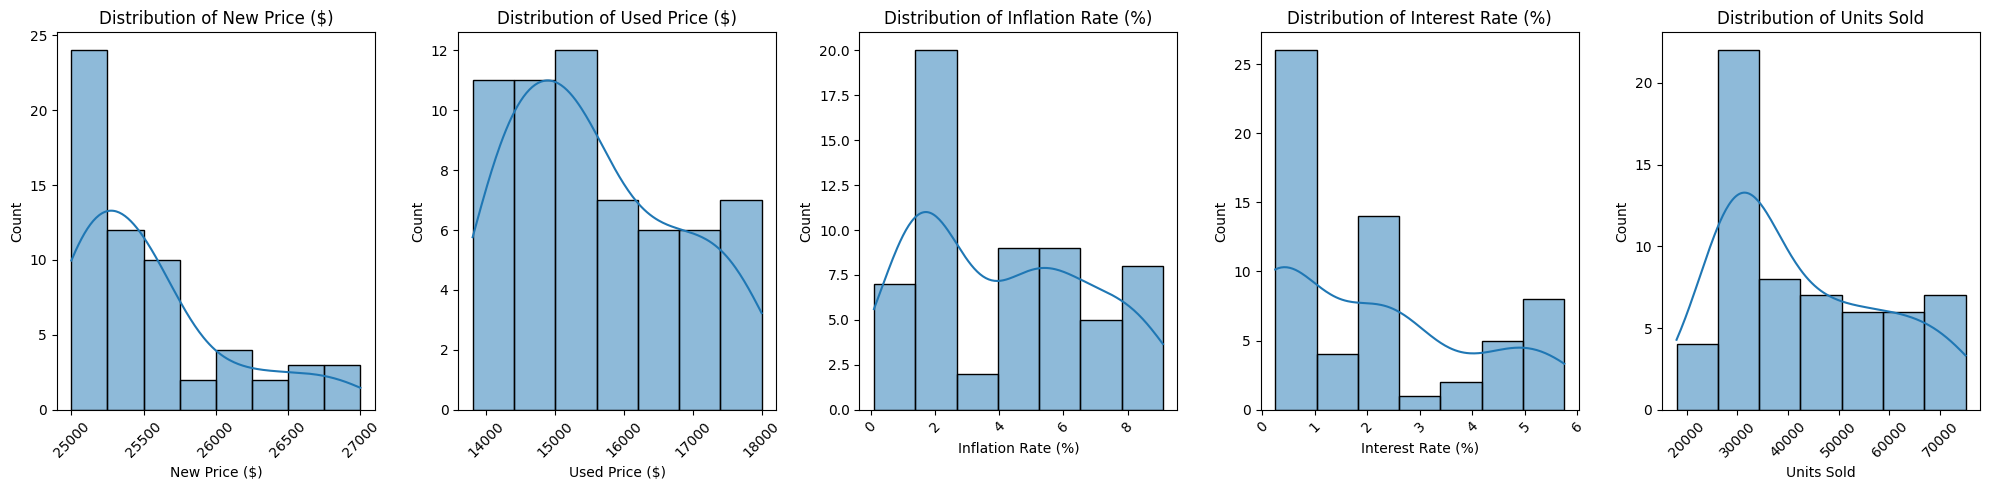

In [18]:
# Select only the desired columns
selected_cols = ['New Price ($)', 'Used Price ($)', 'Inflation Rate (%)', 'Interest Rate (%)', 'Units Sold']

# Set up subplots (1 row, 5 columns)
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes = axes.flatten()  # Flatten just in case

# Plot histogram for each selected column
for i, col in enumerate(selected_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

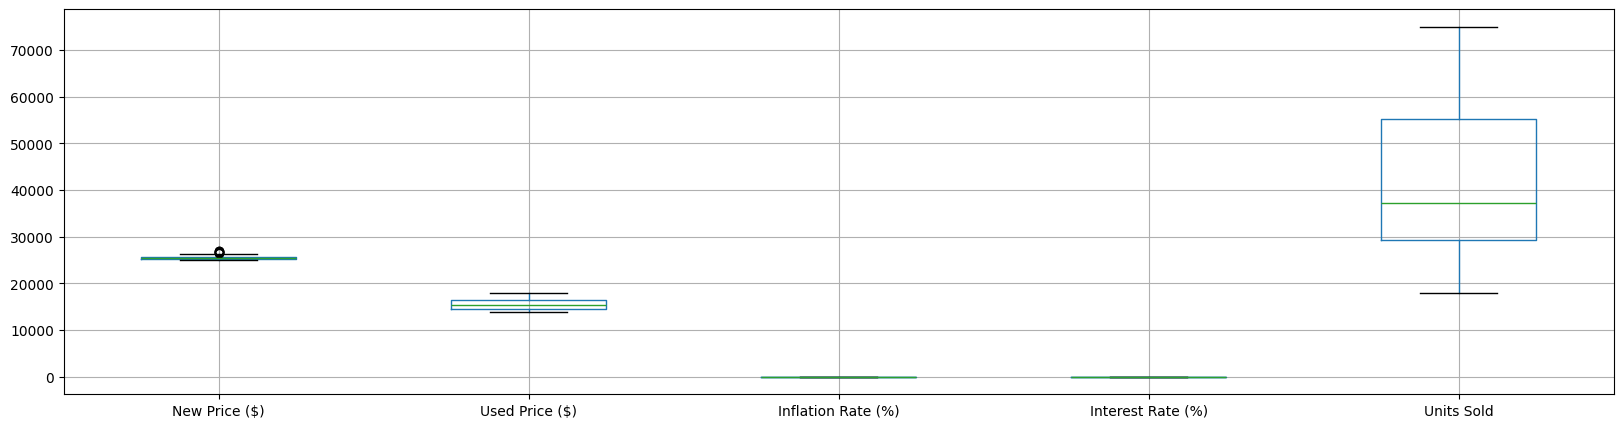

In [19]:
df.boxplot(figsize=(20,5))
plt.show()

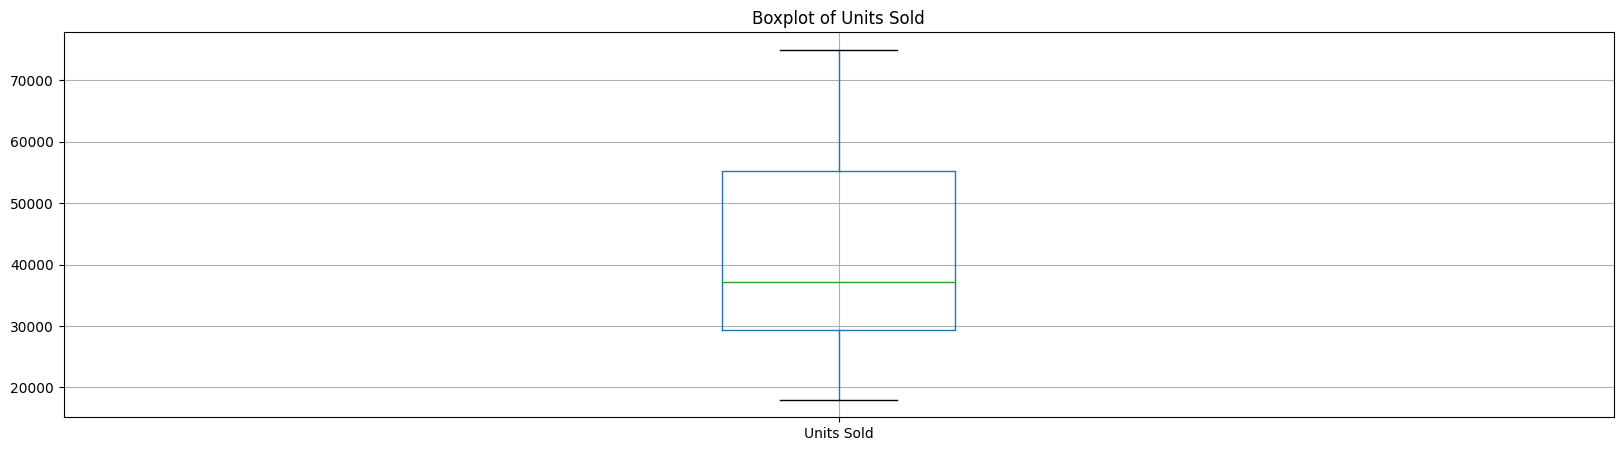

In [20]:
df.boxplot(figsize=(20, 5),column='Units Sold',)
plt.title("Boxplot of Units Sold")
plt.show()


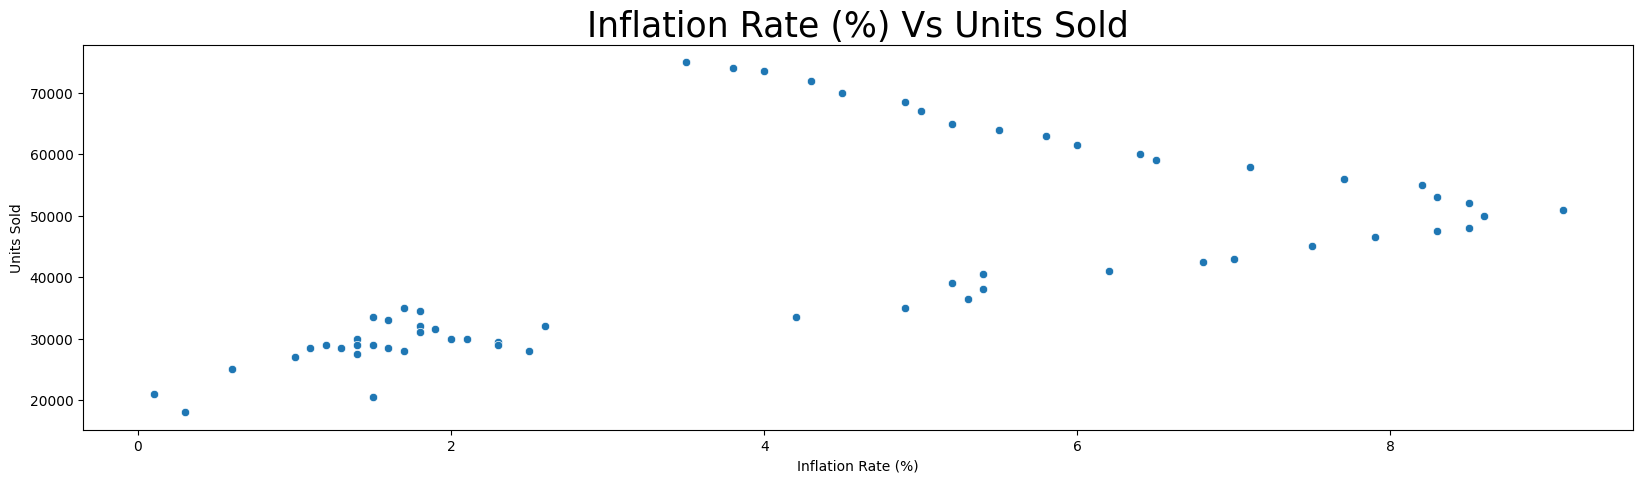

In [21]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df,x='Inflation Rate (%)',y='Units Sold')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Units Sold')
plt.title('Inflation Rate (%) Vs Units Sold',size = 25)
plt.show()

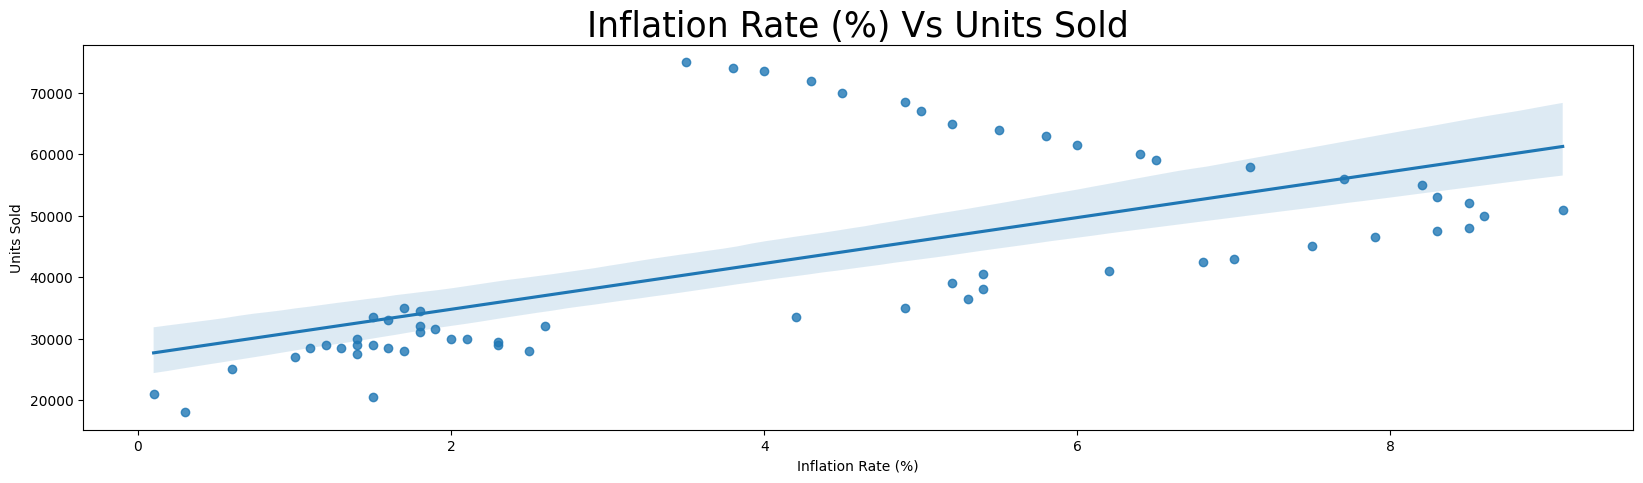

In [22]:
plt.figure(figsize=(20,5))
sns.regplot(data=df,x='Inflation Rate (%)',y='Units Sold')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('Units Sold')
plt.title('Inflation Rate (%) Vs Units Sold',size = 25)
plt.show()

**Feature Engineering**
   


   - Data-Preprocessing

In [23]:
x=df.drop(columns='Units Sold',axis=1)
y=df['Units Sold']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(48, 4)
(48,)
(12, 4)
(12,)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

**Model-Bulding**

In [26]:
'''from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(classifier, model_name, x_train_scale, y_train, x_test_scale, y_test):
    # Train the classifier on scaled data
    classifier.fit(x_train_scale, y_train)

    # Predictions
    y_train_pred = classifier.predict(x_train_scale)
    y_test_pred = classifier.predict(x_test_scale)

    # Evaluation metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='macro')
    recall = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    # Print metrics
    print(f"Training Accuracy of {model_name}: {train_accuracy:.5f}\n")
    print(f"Confusion Matrix:\n{conf_matrix}\n")
    print(f"Test Accuracy of {model_name}: {accuracy:.5f}")
    print(f"Test Precision of {model_name}: {precision:.5f}")
    print(f"Test Recall of {model_name}: {recall:.5f}")
    print(f"Test F1 Score of {model_name}: {f1:.5f}\n")
    print(f"Classification Report:\n{class_report}")

    # Return metrics as dictionary
    return {
        "Model Name": model_name,
        "Training Accuracy": train_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }'''


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def evaluate_regression_model(model, model_name, x_train_scale, y_train, x_test_scale, y_test):
    # Train the regression model
    model.fit(x_train_scale, y_train)

    # Make predictions
    y_train_pred = model.predict(x_train_scale)
    y_test_pred = model.predict(x_test_scale)

    # Calculate regression metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)

    # Print metrics only
    print(f"\n Evaluating Regression Model: {model_name}")
    print(f"Train R² Score: {train_r2:.5f}")
    print(f"Test R² Score: {test_r2:.5f}")
    print(f"MAE (Mean Absolute Error): {mae:.5f}")
    print(f"MSE (Mean Squared Error): {mse:.5f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.5f}")


1. **Linear Regression**

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
evaluate_regression_model(model, "Linear Regression", x_train_scale, y_train, x_test_scale, y_test)



 Evaluating Regression Model: Linear Regression
Train R² Score: 0.97145
Test R² Score: 0.97623
MAE (Mean Absolute Error): 1914.28163
MSE (Mean Squared Error): 5989004.67062
RMSE (Root Mean Squared Error): 2447.24430


 Test R² is more important for model evaluation!
Because:

- Train R² only tells you how well the model learned what it has already seen

- Test R² tells you how well it performs on real, unseen data — this is what matters in production


 Since your train and test R² are close, your model is:

- Not overfitting (Test R² not much lower than Train R²)

- Not underfitting (both scores are high)

This is an ideal scenario 👏

2. **Ridge-Regression**

In [38]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)  # You can experiment with alpha values like 0.1, 10, etc.
evaluate_regression_model(ridge_model, "Ridge Regression", x_train_scale, y_train, x_test_scale, y_test)




 Evaluating Regression Model: Ridge Regression
Train R² Score: 0.97071
Test R² Score: 0.97728
MAE (Mean Absolute Error): 1828.86542
MSE (Mean Squared Error): 5724853.09473
RMSE (Root Mean Squared Error): 2392.66652


3. **Random Forest**

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
evaluate_regression_model(model, "Random Forest Regressor", x_train_scale, y_train, x_test_scale, y_test)



 Evaluating Regression Model: Random Forest Regressor
Train R² Score: 0.99628
Test R² Score: 0.98962
MAE (Mean Absolute Error): 1325.83333
MSE (Mean Squared Error): 2616108.33333
RMSE (Root Mean Squared Error): 1617.43882


4.**Adaptive Boosting (AdaBoost)**

In [40]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
evaluate_regression_model(model, "AdaBoost Regressor", x_train_scale, y_train, x_test_scale, y_test)



 Evaluating Regression Model: AdaBoost Regressor
Train R² Score: 0.99088
Test R² Score: 0.98739
MAE (Mean Absolute Error): 1428.76984
MSE (Mean Squared Error): 3177121.59864
RMSE (Root Mean Squared Error): 1782.44820


5. **Gradient Boosting Machine (GBM)**

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
evaluate_regression_model(model, "Gradient Boosting Regressor", x_train_scale, y_train, x_test_scale, y_test)



 Evaluating Regression Model: Gradient Boosting Regressor
Train R² Score: 0.99993
Test R² Score: 0.98215
MAE (Mean Absolute Error): 1471.09550
MSE (Mean Squared Error): 4497320.60697
RMSE (Root Mean Squared Error): 2120.68871


6. **Decision Tree**

In [42]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
evaluate_regression_model(model, "Decision Tree Regressor", x_train_scale, y_train, x_test_scale, y_test)



 Evaluating Regression Model: Decision Tree Regressor
Train R² Score: 1.00000
Test R² Score: 0.99388
MAE (Mean Absolute Error): 1166.66667
MSE (Mean Squared Error): 1541666.66667
RMSE (Root Mean Squared Error): 1241.63870


7. **K-Nearest Neighbors**

In [43]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
evaluate_regression_model(model, "K-Nearest Neighbors Regressor", x_train_scale, y_train, x_test_scale, y_test)



 Evaluating Regression Model: K-Nearest Neighbors Regressor
Train R² Score: 0.98242
Test R² Score: 0.99052
MAE (Mean Absolute Error): 1100.00000
MSE (Mean Squared Error): 2388333.33333
RMSE (Root Mean Squared Error): 1545.42335


8. **Lasso Regression**

In [44]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1.0)
evaluate_regression_model(model, "Lasso Regression", x_train_scale, y_train, x_test_scale, y_test)



 Evaluating Regression Model: Lasso Regression
Train R² Score: 0.97145
Test R² Score: 0.97626
MAE (Mean Absolute Error): 1912.30070
MSE (Mean Squared Error): 5980751.16425
RMSE (Root Mean Squared Error): 2445.55743


9. **ElasticNet Regression**

In [51]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1.0, l1_ratio=0.5)
evaluate_regression_model(model, "ElasticNet Regression", x_train_scale, y_train, x_test_scale, y_test)



 Evaluating Regression Model: ElasticNet Regression
Train R² Score: 0.92792
Test R² Score: 0.93852
MAE (Mean Absolute Error): 3104.77633
MSE (Mean Squared Error): 15488141.32091
RMSE (Root Mean Squared Error): 3935.49760


10. **XGBoost Regressor**

In [50]:
from xgboost import XGBRegressor

model = XGBRegressor(objective='reg:squarederror')
evaluate_regression_model(model, "XGBoost Regressor", x_train_scale, y_train, x_test_scale, y_test)



 Evaluating Regression Model: XGBoost Regressor
Train R² Score: 1.00000
Test R² Score: 0.97685
MAE (Mean Absolute Error): 1862.67871
MSE (Mean Squared Error): 5832113.50000
RMSE (Root Mean Squared Error): 2414.97692


11. **LightGBM Regressor**

In [48]:
pip install lightgbm


In [49]:
from lightgbm import LGBMRegressor

model = LGBMRegressor()
evaluate_regression_model(model, "LightGBM Regressor", x_train_scale, y_train, x_test_scale, y_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 48, number of used features: 4
[LightGBM] [Info] Start training from score 41218.750000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [54]:
accuracy_of_model = pd.DataFrame({
    'Model': [
        'Linear Regression', 'Ridge Regression', 'Lasso Regression',
        'ElasticNet Regression', 'Random Forest Regressor',
        'AdaBoost Regressor', 'Gradient Boosting Regressor',
        'Decision Tree Regressor', 'KNN Regressor', 'XGBoost Regressor',
        'LightGBM Regressor'
    ],
    'Score': [
        0.97623, 0.97728, 0.97626, 0.93852, 0.98962,
        0.98739, 0.98215, 0.99388, 0.99052 , 0.97685,
        0.85404
    ]
})

accuracy_sorted = accuracy_of_model.sort_values(by='Score', ascending=False)


In [55]:
fig = px.bar(
    data_frame=accuracy_sorted,
    x='Score',
    y='Model',
    color='Score',
    text='Score',
    orientation='h',
    template='plotly_dark',
    title='📊 Regression Models Comparison (Based on Test R² Score)'
)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(
    xaxis_title='Test R² Score',
    yaxis_title='Model',
    title_font_size=22,
    font=dict(size=14),
    bargap=0.3,
    height=600
)

fig.show()
